# Деревья решений
---

Общий термин "дерево решений" можно описать как схему, отображающую выбор решения:

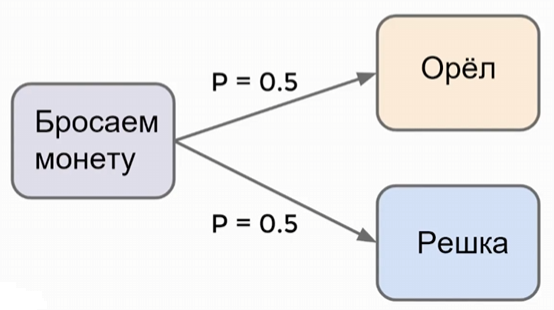

Однако мы будем рассматривать такой термин как - **обучение деревьев решений** - это статистическое моделирование с применением деревьев, где решения в каждом узле принимаются на основе некоторого условия(некоторой метрики).

---
---
## Терминология

Рассмотрим простой пример:

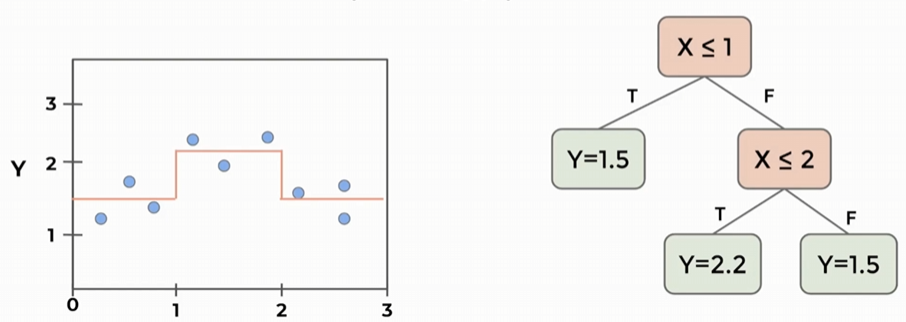

Здесь создано некоторое дерево решений, которое позволяет смоделировать график для непрерывной переменной. Рассмотрим некоторые термины для этого дерева.

1. **Разбиение(splitting)** - когда в каждом узле дерева принимается некоторое решение, т.е. некоторое условие возвращает либо True, либо False.
2. Отдельные прямоугольники на диаграмме - **узлы дерева**. Они бывают разных типов:
   * **В самой вершине дерева - корневой узел(root node)** - это будет самое первое условие или самый первый признак, по которому будут разбиваться данные
   * **В самом низу - находятся листовые узлы(leaf/terminal nodes)** - это те узлы где мы возвращаем некоторый результат для нашей целевой переменной. Здесь мы не выполняем каких-либо разбиений, а уже принимаем некоторое решение.
   * **Родительские узлы и дочерние узлы** на рисунке обозначены зелёным и жёлтым цветом соответственно:

     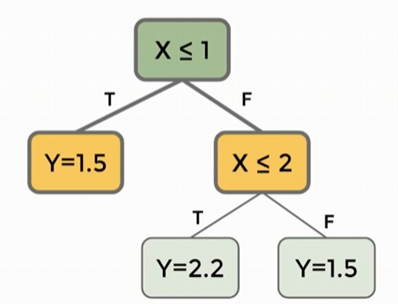
     
     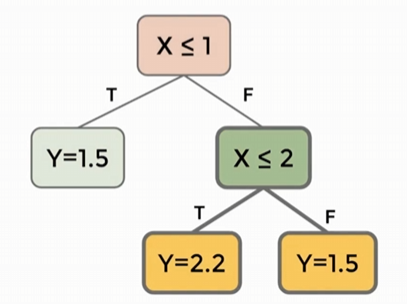

3. **Ветка дерева/поддеревья(tree branches/sub trees)** - некоторая часть общего дерева, еоторая предтавляет из себя отдельное маленькое дерево:

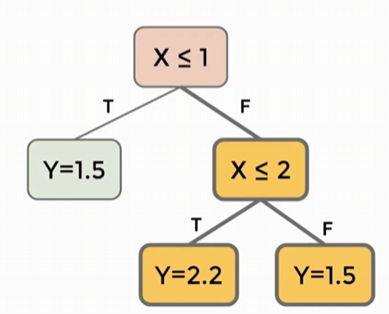

4. **Усечение дерева(pruning)** - идея заключается в том, что можно сделать отдельные ветви дерева покороче с целью избежать переобученности модели:
   
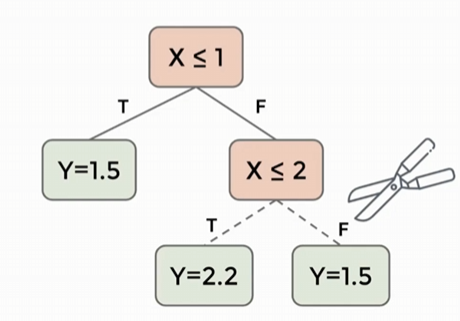

---
---
## Метрика Gini impurity

Метрика **Gini impurity** измеряет, насколько чистой("pure") явдяется информация в наборе данных. С точки зрения задачи *классификации*, можно воспринимать это как *однородность классов*. 

Рассмотрим на примере:  
Метрика "gini impurity" для задачи классификации вычисляется следующим образом - для набора классов C и заданного набора данных Q:
$$G(Q) = \sum_{c\in{C}}p_c(1-p_c)\text{, где }$$
$$p_c = \frac{1}{N_Q}\sum_{x\in{Q}}1(y_{class}=c)$$

Если попытаться нанести метрику "gini impurity" на график, где по горизонтали - вероятность $p_c$, то получится график вида:

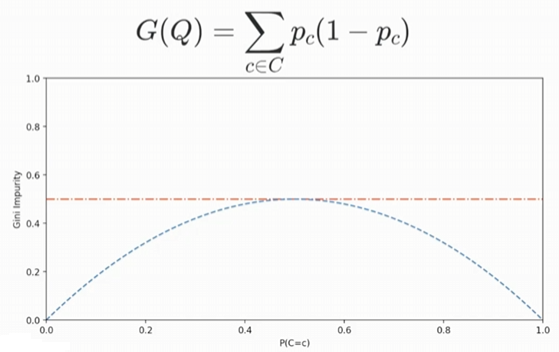

Когда вероятность $p_c$ равна нулю или единице - то метрика "gini impurity" равна нулю. Это следствие того, что в формуле есть два слагаемых $p_c$ и $1-p_c$ - они обнуляются либо когда $p_c = 0$, либо когда $p_c = 1$. Посередине, **в точке 0.5**, находится **точка max** для метрики "gini impurity". **В этой точке сама метрика равна 0.5.**

Представим, что мы строим некоторое дерево, в определённом узле которого необходимо выполнить разбиениеданных. В качестве набора данных - 4 точки разделённых на два класса:

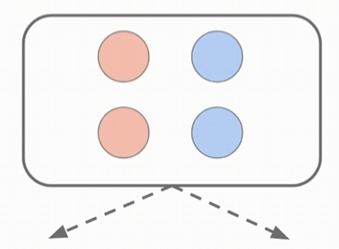

Эти точки представляют собой максимально неоднородный набор точек, если бы все точки были только красные или только синие - у нас был бы однородный набор точек.

Выполним вычисления метрики "gini impurity" для этого примера:

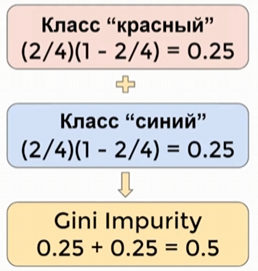

Получилось **максимально возможное** значение метрики "gini impurity".

Можно рассмотреть вычисление метрики для более однородного набора точек:

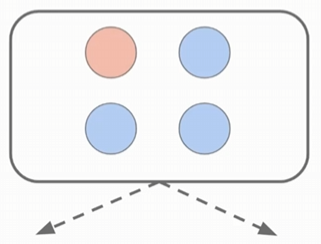

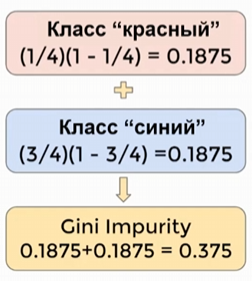

Можно сказать, что эти данные являются более *"чистыми"*. В них больше однородности, так как синего класса больше, чем красного. Поэтому метрика "gini impurity" для этого набора данных меньше, чем в предыдущем случае.

Здесь числа для классов одинаковы, так как формула $p_c(1-p_c)$ устроена как бы зеркальным образом - для случая двух классов получаем, что $p_c$ одного класса равно $(1-p_c)$ для второго класса. Поэтому для двух классов можно получить одинаковые значения.

Если рассмотрим такие данные, для которых все точки принадлежат к одному классу, то эти данные будут являться наиболее чистыми:

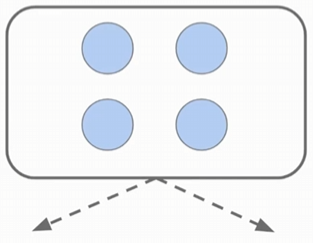

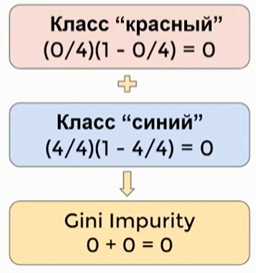

Для таких данных индекс "gini impurity" будет равен нулю, потому что для класса *красный* у нас будет ноль красных точек. В этом примере у нас полностью однородные данные, нет смеси из разных классов.

### Зачем нужна метрика Gini impurity?

Если цель дерева решений в том, чтобы отделить классы друг от друга, то мы можем выполнять разбиения данных на основе метрики "gini impurity". В таком случае - мы хотим **минимизировать "gini impurity"** на листьях, потому что если на листовых узлах значение "gini impurity" будет минимально, то это будет означать, что все данные этого листового узла принадлежат к одному классу, так как листовые узлы - это результат работы модели.

Если какой-то листовой узел говорит, что новая точка должна быть *синей*, то нам хотелось бы получить в этом узле как можно меньшее значение "gini impurity", в идеале - нулевое. В таком случае, можно сказать, что данные разделяются на классы с помощью дерева. 

---
---
## Построение деревьев решений с помощью Gini Impurity

Если признаков несколько, для начала необходимо решить - какой признак будет применяться в корневом узле, т.е. для самого первого разбиения данных.

Для решения этого вопроса можно взять метрику "gini impurity" и с ее помощью измерить количество информации, которое содержится в различных признаках в обучающем наборе данных. Для разбиений, хотелось бы применять те признаки, которые содержат много информации.

Рассмотрим пример - необходимо создать дерево решений для определения спама в электронных письмах. 
В качестве входных данных будет один признак X, который будет принимать два значения - Yes(внутри письма была ссылка, на которую можно нажать) и No(внутри письма ссылок не было):

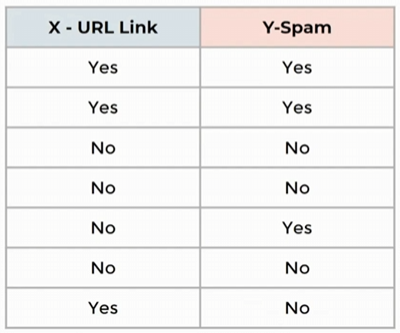

**Для нашего дерева решений ставится вопрос - содержит ли письмо ссылку True или False:**

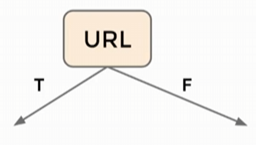

Для значения True:

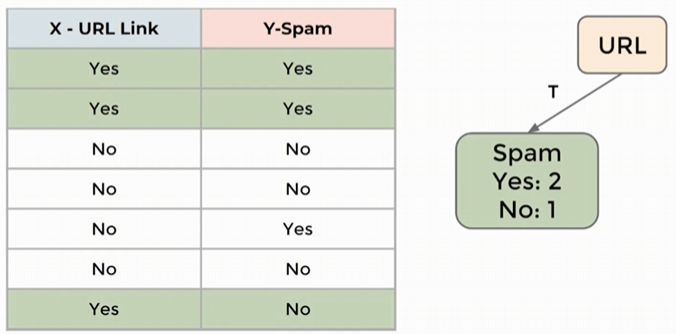

Если посмотреть на письма, внутри которых были ссылки, то два из них были спамом, а одно - обычным. 

Для значения False:

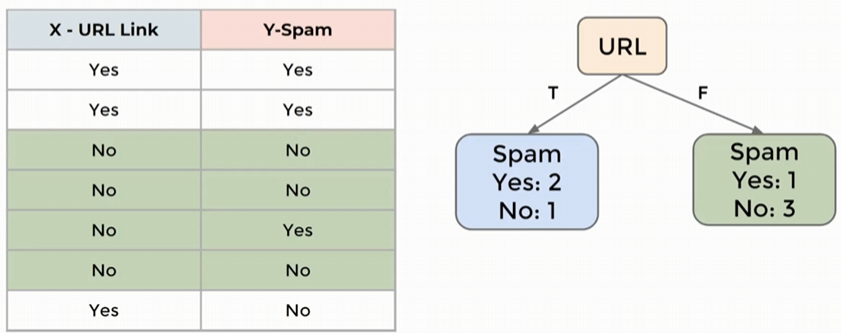

В большинстве случаев, такие письма не являлись спамом: три письма были обычными и только одно - спамом.

**Следующий шаг - посчитать метрику "gini impurity" для этого признака URL.**

Для начала - посчитаем метрику для каждого листового узла, а затем выполним *взвешенное усреднение* полученных значений, чтобы получить "gini impurity" для всего признака URL. Это нужно в том случае, когда есть несколько признаков и какой-то из признаков имеет наименьшее значение "gini impurity", чем другие признаки - такой признак, скорее всего, будет очень полезен для разбиения данных. Потому что в таком разбиении мы будем использовать много информаци и после него получим более однородные данные, с более низкими значениями "gini impurity".

**В идеальном случае, хотелось бы получить такое разбиение данных в узле, чтобы сложить весь спам в одну сторону, а обычные письма в другую.** Если получится такое сделать, то в каждом из листовых узлов получатся минимальные значения "gini impurity", а в идеальном случае - нулевые.

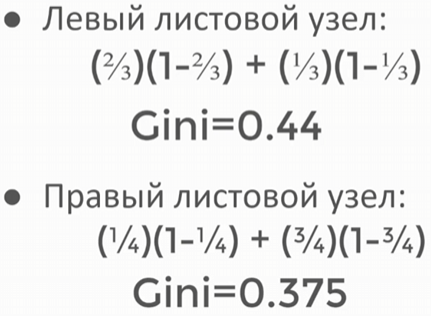

**Вычисляем метрику "gini impurity" для всего признака в целом.**

Выполняем взвешенное усреднение - общее количество писем равно семи, после разбиения, слева - три письма, а справа - четыре письма. Поэтому при взвешивании будем учитывать, сколько писем находилось в каждом листовом узле:

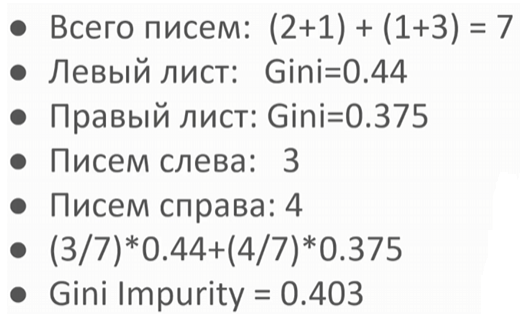

### Случай непрерывных переменных

Рассмотрим ту же самую задачу определения спама, но на этот раз будет непрерывный признак - **количество слов в письме**:

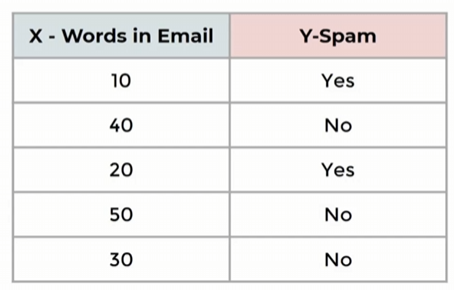

**Самый первый шаг - отсортировать все данные по этому признаку:**

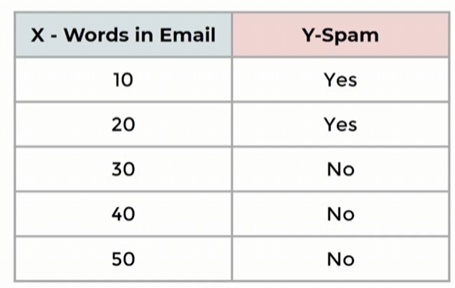

**Далее, рассмотрим узел, в котором этот признак используется для разбиения:**

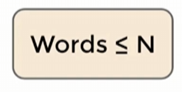

В этом узле будет сравниваться значение признака с некоторым числом N. Здесь можно сделать следующее - можно взять средние значения между теми значениями, которые есть в наших данных и далее использовать эти средние значения в качестве значений для разьиения данных:

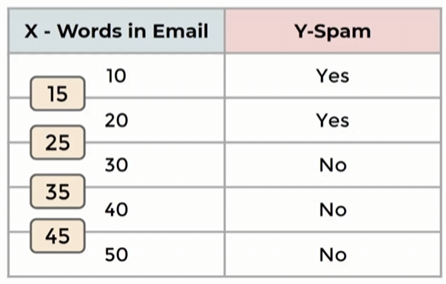

Возьмём например первые две строки:

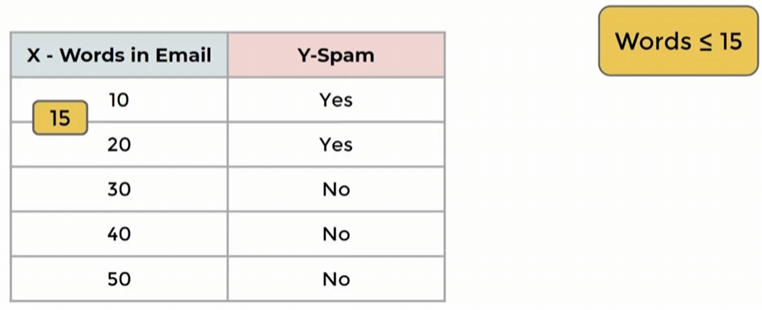

Число 15 является хорошим числом для разбиения данных, так как в таком случае данные очень чётко разделятся на две части:

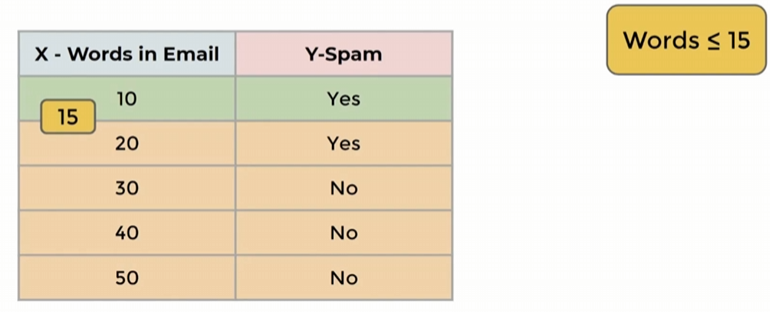

В таком случае можно вычислить метрику "gini impurity" для этого конкретного разбиения:

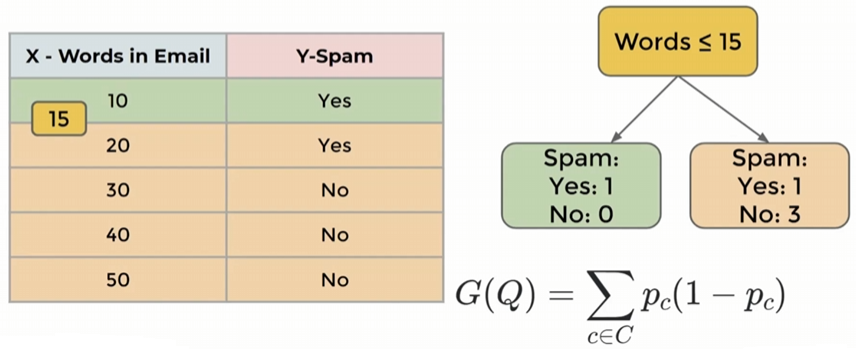

Для этого конкретого разбиения мы получаем отдельно одну строку и отдельно все остальные строки. Именно поэтому на первом шаге данные были отсортированы, чтобы здесь можно было разделить все данные на две части.

Для левого листа, метрика "gini impurity" равна нулю - потому что в этом узле всего одно письмо, которое принадлежит к классу *Spam*.

Далее вычисляем метрику для правого листового узла, и после этого берём взвешенное среднее левого и правого узла, чтобы вычислить общую метрику "gini impurity", причём только для данного конкретного разбиения:

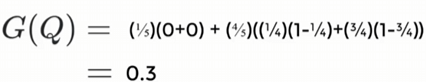

Значение "gini impurity" = 0.3 - это значение для этого конкретного признака, **но только для конкретного разбиения данных(!!!)**, когда в условии разбиения указано число 15.

**После этого необходимо проверить другие разбиения:**

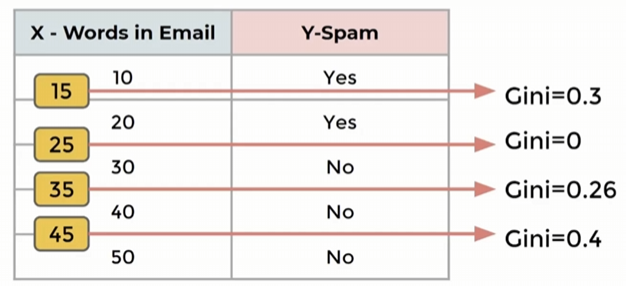

Мы видим, что одно из разбиений имеет наименьшее значение "gini impurity" = 0. Можно взять это значение разбиение(число 25), взять соответствующее значение "gini impurity" = 0 и это будет значение "gini impurity" для данного конкретного признака.

**В случае если в задаче несколько признаков - тогда, если какой-то из этих признаков имел бы "gini impurity" = 0, то с помощью этого признака можно было бы идеально раздилить данные, т.е. другие признаки даже не понадобились бы.** Однако, такая ситуация - редкость, во многих задачах можно увидеть ситуации когда какой-то один признак **не сможет** идеально разделить данные. В таком случае - выбирают признак, у которого "gini impurity" - минимальное. Такой признак, лучше всего поместить в корневой узел дерева, потому что он лучше всего разделяет данные на два класса.

### Случай мульти-категориальных признаков

Для той же самой задачи возьмём признак - **отправитель письма**:

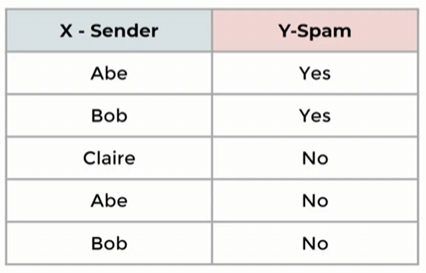

Здесь три значения: Abe, Bob, Claire.

**Вычислим "gini impurity" для всех комбинаций:**

Для начала рассмотрим случай, когда *отправитель = Abe*:

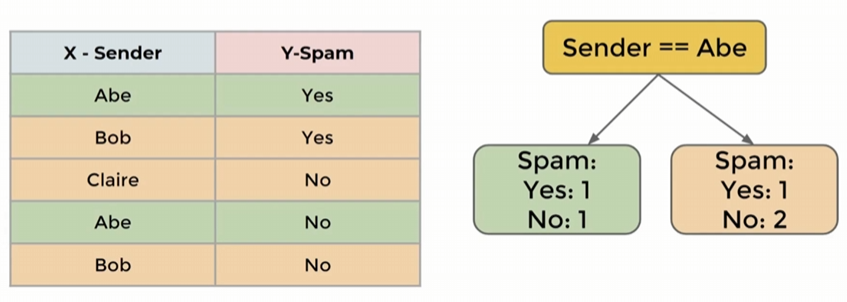

Для данной конкретной комбинации метрика "gini impurity" вычисляется также, как и в случае двух классов. Для каждой из двух частей необходимо посмотреть - сколько спама и сколько обычных писем. Далее делается всё то же самое для других отправителей:

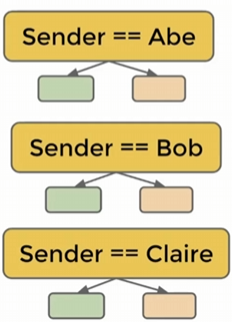

**Но также необходимо проверить различные комбинации из нескольких значений:**

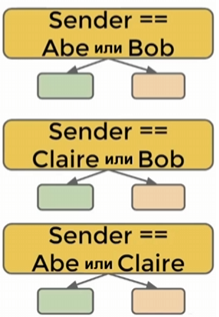

После чего из этих вариантов выбирается тот, для которого значение "gini impurity" минимально. Это и будет то условие, которое наиболее эффективно разбивает данные на два класса.

---
---

## Как выбрать признак для корневого узла, когда признаков несколько

Нужно вычислить "gini impurity" для каждого признака, выбрать тот где метрика наименьшая, и взять его первым так как в самом начале дерева хотелось бы разделить данные таким образом, чтобы в левой и правой ветках оказались как можно более однородные данные.

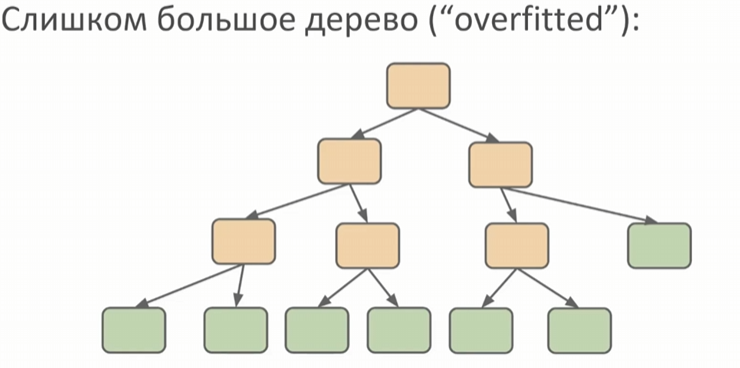

Чтобы избежать переобученности, можно добавить гиперпараметр, который будет отвечать за минимальное уменьшение метрики "gini impurity" после разбиения данных:

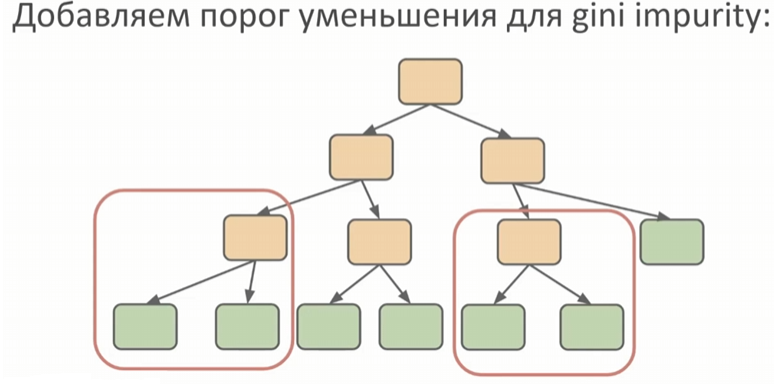

То есть, будет выполняться разбиение только в тех случаях, когда после разбиения будет получаться заметное уменьшение "gini impurity". Если же какое-то разбиение будет лишь немного уменьшать "gini impurity", то такие разбиения выполняться не будут:

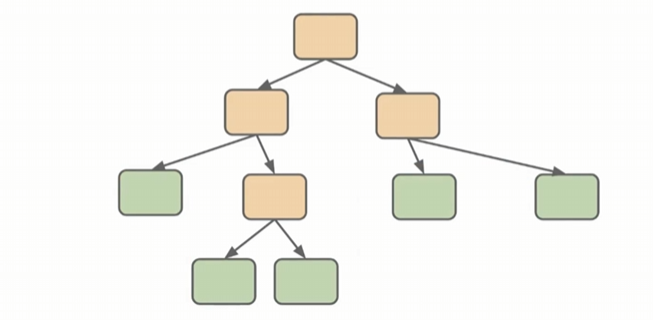

Это приводит к усечению дерева решений, вместо этих разбиений будут размещены листовые узлы.

Ещё одним гиперпараметром может являться глубина дерева:

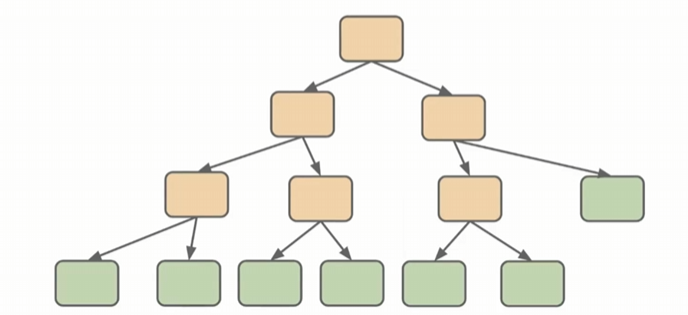

Можно, например, сказать что будет не более двух уровней разбиения данных:

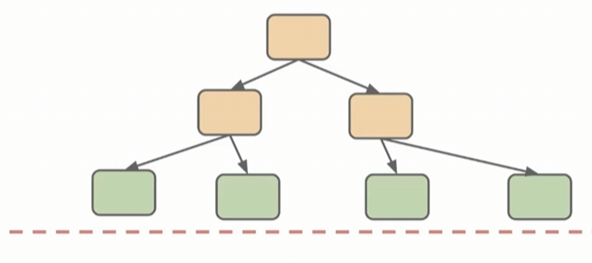

Для всех дальнейших разбиений будет выполнено усечение.

---